<a href="https://colab.research.google.com/github/kairamilanifitria/Master-Degree-Exercise/blob/main/Tugas1_Data_Visualization_Kaira_Milani_Fitria.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Nama : Kaira Milani Fitria (2221210065)

*   Menampilkan deskripsi statistik dari dataset iris dari scikit_learn.
*   Menggunakan library matplotlib dan plotly (interaktif)



Plot preview:


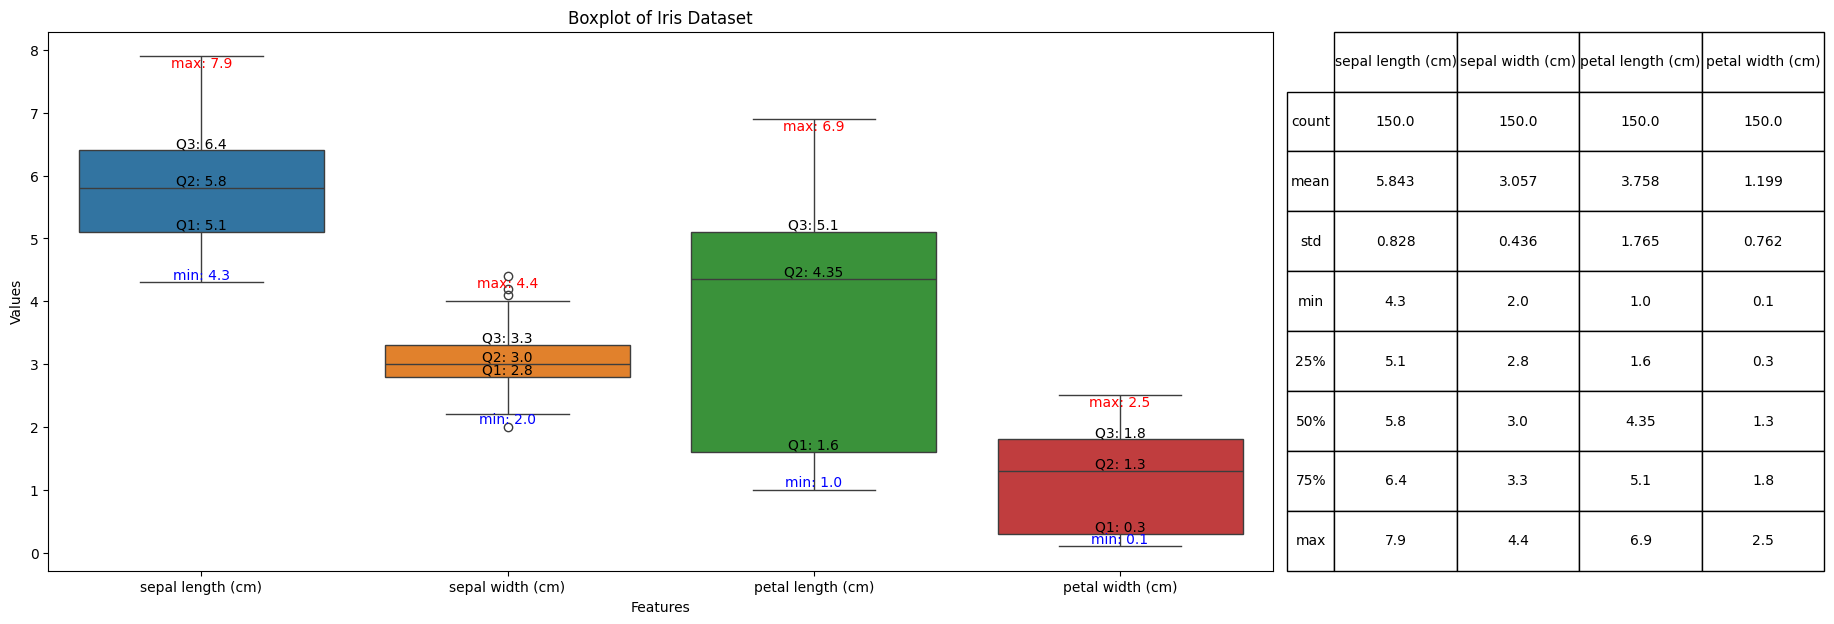

In [2]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [3]:
from sklearn.datasets import load_iris

In [4]:
iris = load_iris()

df_iris = pd.DataFrame(data=iris.data, columns=iris.feature_names)
df_iris['target'] = iris.target
df_iris

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,2
146,6.3,2.5,5.0,1.9,2
147,6.5,3.0,5.2,2.0,2
148,6.2,3.4,5.4,2.3,2


In [5]:
df_iris.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0


In [6]:
num_train_rows, num_train_columns = df_iris.shape
#Printing the number of rows and columns.
print("Iris Flower Data:")
print(f"Number of Rows: {num_train_rows}")
print(f"Number of Columns: {num_train_columns}\n")

Iris Flower Data:
Number of Rows: 150
Number of Columns: 5



In [7]:
# Null Values in Train
df_null = df_iris.isnull().sum().sum()

print(f'Null Count in Data: {df_null}')


Null Count in Data: 0


In [8]:
# Count duplicate rows in train_data
data_duplicates = df_iris.duplicated().sum()

print(f"Number of duplicate rows in Data: {data_duplicates}")

Number of duplicate rows in Data: 1


In [9]:
# Info Data
df_iris.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   sepal length (cm)  150 non-null    float64
 1   sepal width (cm)   150 non-null    float64
 2   petal length (cm)  150 non-null    float64
 3   petal width (cm)   150 non-null    float64
 4   target             150 non-null    int64  
dtypes: float64(4), int64(1)
memory usage: 6.0 KB


In [10]:
# Descriptive Statistics of Data

summary = df_iris.describe()
df_iris.describe()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target
count,150.000000,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.057333,3.758000,1.199333,1.000000
std,0.828066,0.435866,1.765298,0.762238,0.819232
min,4.300000,2.000000,1.000000,0.100000,0.000000
25%,5.100000,2.800000,1.600000,0.300000,0.000000
50%,5.800000,3.000000,4.350000,1.300000,1.000000
75%,6.400000,3.300000,5.100000,1.800000,2.000000
max,7.900000,4.400000,6.900000,2.500000,2.000000


# 1. Box Plot with matplotlib

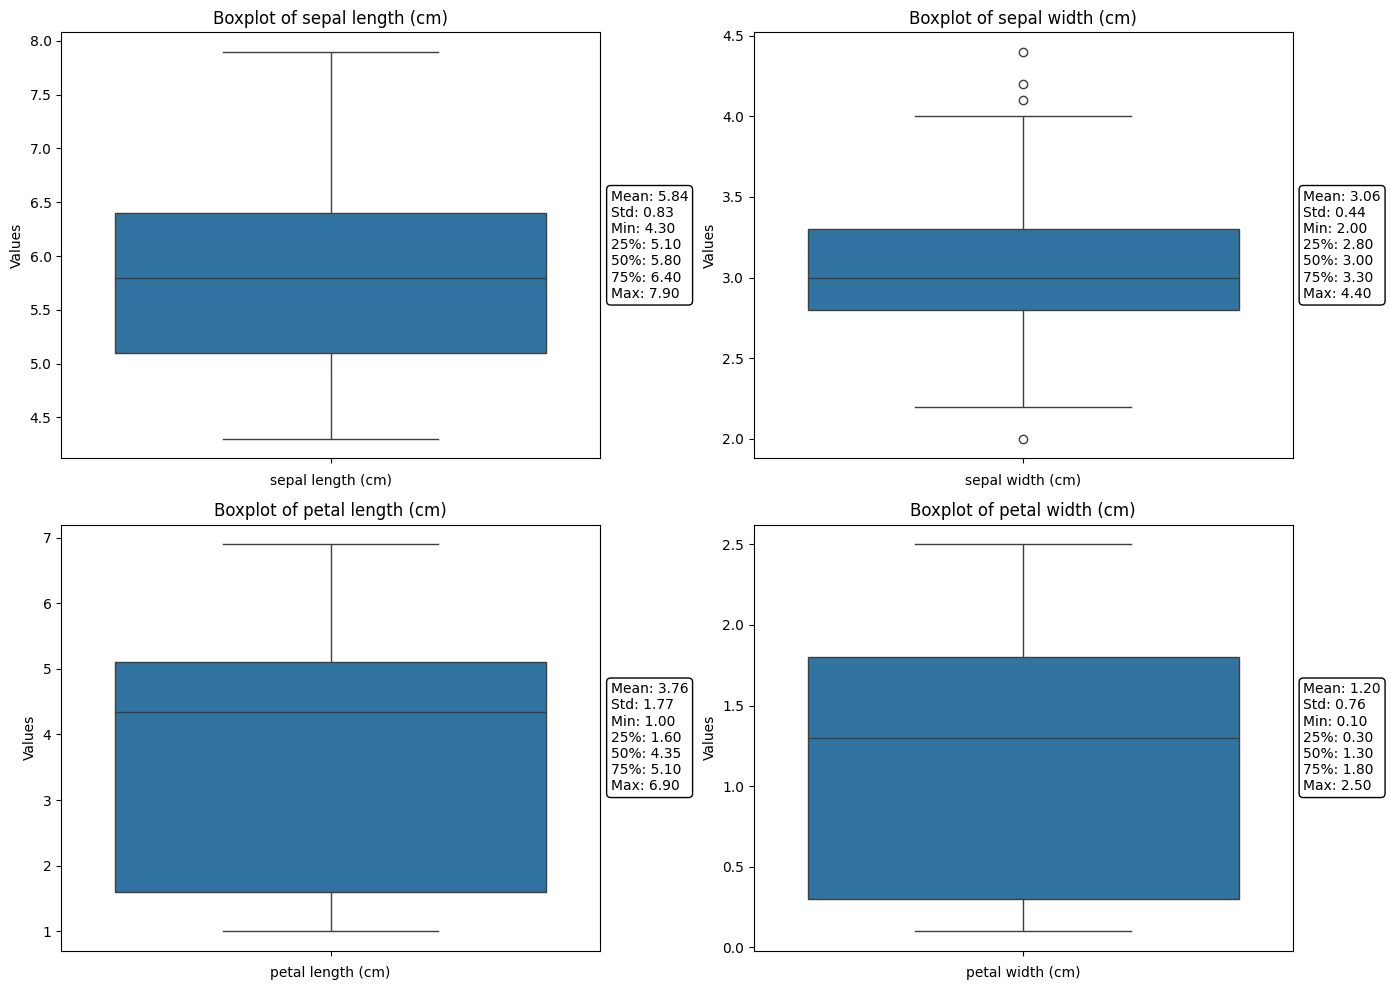

In [11]:
# Create boxplots for each column
plt.figure(figsize=(14, 10))
for i, column in enumerate(df_iris.columns[:-1]):  # Exclude the last column (species) which is categorical
    plt.subplot(2, 2, i + 1)  # Create a 2x2 grid for subplots
    sns.boxplot(y = df_iris[column])
    plt.title(f'Boxplot of {column}')
    plt.xlabel(column)
    plt.ylabel('Values')

    # Add the statistical summary to each plot
    stats_text = f"Mean: {summary[column]['mean']:.2f}\n" \
                 f"Std: {summary[column]['std']:.2f}\n" \
                 f"Min: {summary[column]['min']:.2f}\n" \
                 f"25%: {summary[column]['25%']:.2f}\n" \
                 f"50%: {summary[column]['50%']:.2f}\n" \
                 f"75%: {summary[column]['75%']:.2f}\n" \
                 f"Max: {summary[column]['max']:.2f}"

    # Position the text to the right of the plot area
    plt.gca().annotate(stats_text, xy=(1.02, 0.5), xycoords='axes fraction',
                       fontsize=10, ha='left', va='center', bbox=dict(boxstyle="round,pad=0.3", edgecolor='black', facecolor='white'))

plt.tight_layout()
plt.show()

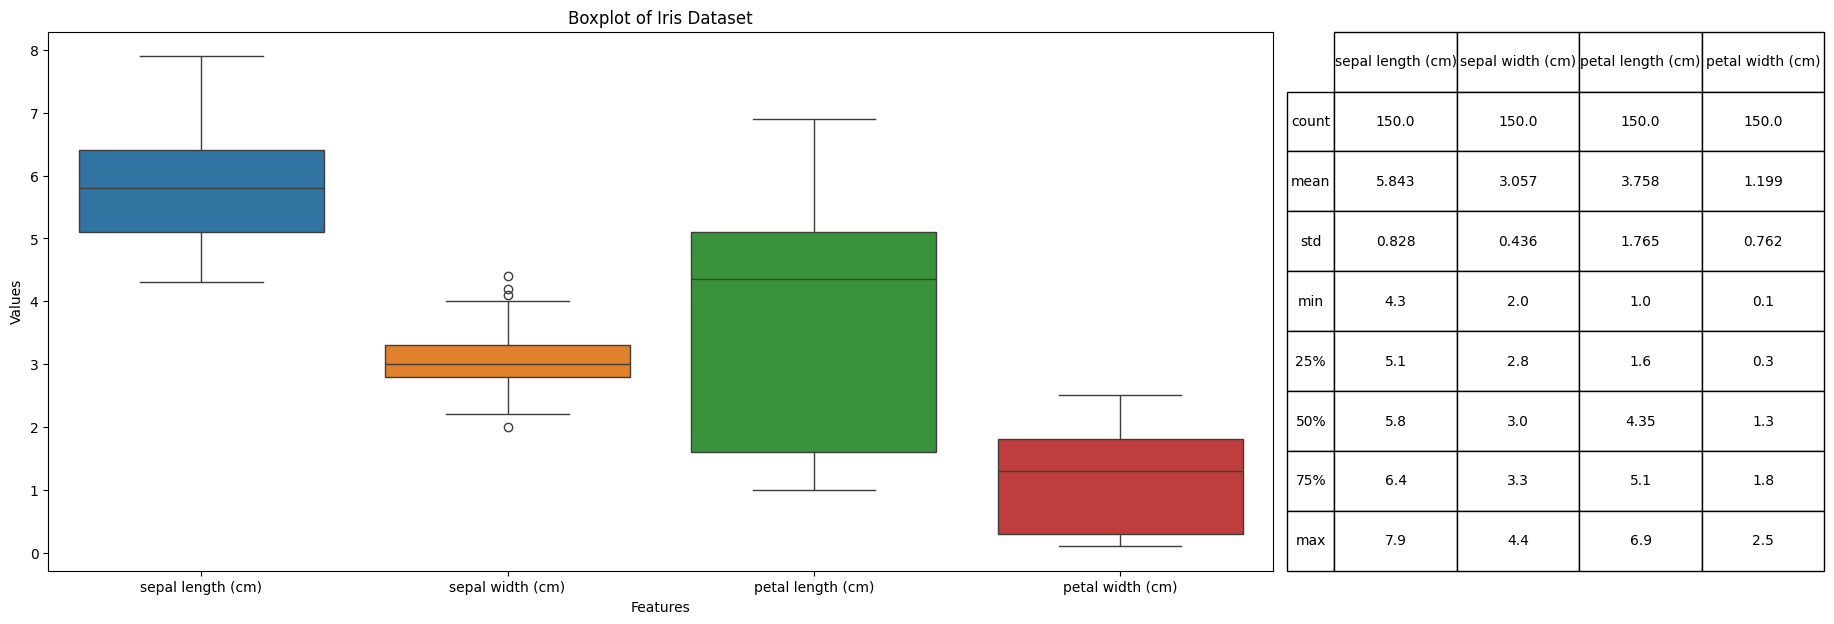

In [12]:
import matplotlib.pyplot as plt
import seaborn as sns

# Select columns excluding 'target'
columns_to_plot = df_iris.drop(columns=['target'])

# Create the boxplot
plt.figure(figsize=(14, 7))
sns.boxplot(data=columns_to_plot)
plt.title('Boxplot of Iris Dataset')
plt.xlabel('Features')
plt.ylabel('Values')

# Extract summary statistics and format mean and std to 3 decimal places
describe_df = columns_to_plot.describe().round(3)

# Add table to the right of the plot
table = plt.table(cellText=describe_df.values,
                  colLabels=describe_df.columns,
                  rowLabels=describe_df.index,
                  cellLoc='center',
                  rowLoc='center',
                  colLoc='center',
                  bbox=[1.05, 0, 0.4, 1])

# Adjust font size
table.auto_set_font_size(False)
table.set_fontsize(10)

# Adjust layout to make room for the table
plt.subplots_adjust(right=1.0)

plt.show()


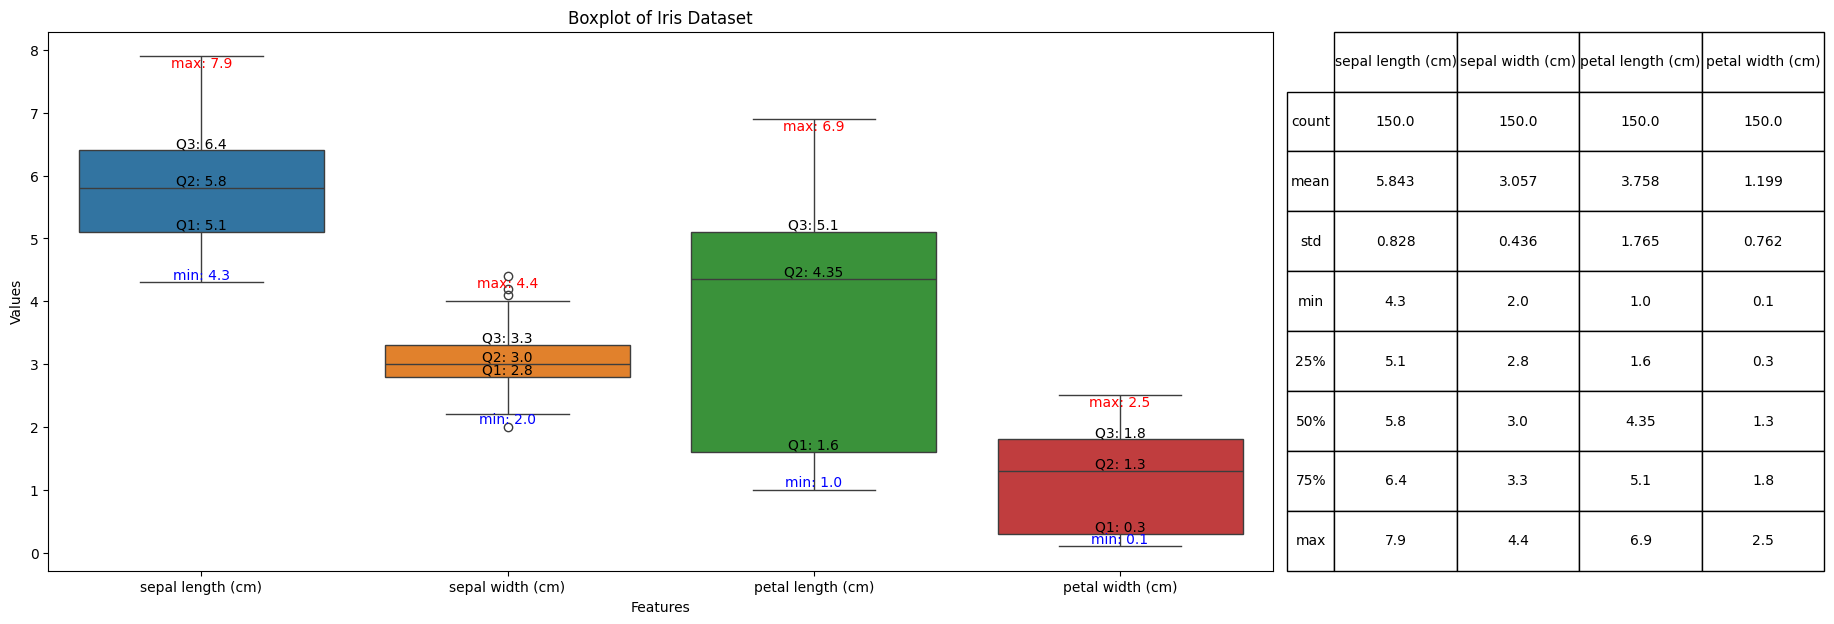

In [13]:
import matplotlib.pyplot as plt
import seaborn as sns

# Select columns excluding 'target'
columns_to_plot = df_iris.drop(columns=['target'])

# Create the boxplot
plt.figure(figsize=(14, 7))
sns.boxplot(data=columns_to_plot)
plt.title('Boxplot of Iris Dataset')
plt.xlabel('Features')
plt.ylabel('Values')

# Extract summary statistics and format mean and std to 3 decimal places
describe_df = columns_to_plot.describe().round(3)

# Add table to the right of the plot
table = plt.table(cellText=describe_df.values,
                  colLabels=describe_df.columns,
                  rowLabels=describe_df.index,
                  cellLoc='center',
                  rowLoc='center',
                  colLoc='center',
                  bbox=[1.05, 0, 0.4, 1])

# Adjust font size
table.auto_set_font_size(False)
table.set_fontsize(10)

# Iterate over each feature's boxplot to annotate quartiles, min, and max values
for i, feature_name in enumerate(columns_to_plot.columns):
    # Get the statistics for the current feature
    stats = columns_to_plot[feature_name].describe()

    # Annotate quartiles, min, and max values on the plot
    plt.text(i, stats['min'], f"min: {stats['min']}", ha='center', va='bottom', color='blue', fontsize=10)
    plt.text(i, stats['25%'], f"Q1: {stats['25%']}", ha='center', va='bottom', color='black', fontsize=10)
    plt.text(i, stats['50%'], f"Q2: {stats['50%']}", ha='center', va='bottom', color='black', fontsize=10)
    plt.text(i, stats['75%'], f"Q3: {stats['75%']}", ha='center', va='bottom', color='black', fontsize=10)
    plt.text(i, stats['max'], f"max: {stats['max']}", ha='center', va='top', color='red', fontsize=10)

# Adjust layout to make room for the table
plt.subplots_adjust(right=1.0)

plt.show()


# 2. Box Plot with Plotly (interactive)

In [14]:
import pandas as pd
import plotly.graph_objs as go
import plotly.express as px


# Generate the statistical summary
summary = df_iris.describe()

# Create boxplots for each column
fig = go.Figure()

for column in df_iris.columns[:-1]:  # Exclude the last column (species) which is categorical
    fig.add_trace(go.Box(
        y=df_iris[column],
        name=column,
        boxmean='sd'  # This will show mean and standard deviation
    ))

    # Add mean and std values as annotations
    mean_val = summary[column]['mean']
    std_val = summary[column]['std']
    fig.add_annotation(
        x=column,
        y=mean_val,
        text=f"Mean: {mean_val:.2f}\nStd: {std_val:.2f}",
        showarrow=True,
        arrowhead=1
    )

# Update layout for better visualization
fig.update_layout(
    title="Boxplot of Iris Dataset with Mean and Std Dev",
    yaxis_title="Values",
    xaxis_title="Features",
    showlegend=False
)

fig.show()


# Thank You